# Question 1: Structural features
**1.1 cif-cn-featurizer**

Our friend Anton Oliynyk has recently released a new python script `cif-cn-featurizer`. 

Here is their description "A Python script designed to process CIF (Crystallographic Information File) files and extract various features from them. These features include interatomic distances, atomic environment information, and coordination numbers. The script can handle binary and ternary compounds."

Let's test it out and see how it works! To do so we will need some cifs. Right now the featurizer only works with binaries made up of certain elements shown in this plot. 

![allowed elements](https://github.com/sp8rks/MaterialsInformatics/blob/main/HW/HW2/cif-cn-featurizer-allowed-elements.png?raw=true)

**<font color='teal'>a)</font>** Download the `cif-cn-featurizer` files and run it on the cif files in the `HW\cn-featurizer\cifs` folder. 

Note: in case you can't get it working, you'll also find a csv folder with all the extracted features for these cifs already complete, but try and get it working so you can use it in the future!

In [1]:
#you can run this in your miniconda command prompt if you prefer\

# Do i need to import each python code individually that is in the cif-cn-featurizer folder???

#from pathlib import Path
#import sys
#files_dir = Path("C:\MaterialsInformatics\cn-featurizer\cifs")
#files = files_dir.iterdir()
#sys.path.append( 'C:\cif-cn-featurizer' )
#import main as ccnfeat
#features = ccnfeat.main()


# I used the miniconda command prompt


**1.2 Getting labeled data for the cifs**

**<font color='teal'>b)</font>** Now that you've got feature vectors in a series of .csv files, let's use them to build a model to predict a property. To get a property let's search for a materials project entry using the cif cards! If you've forgotten how, go back to the `legacy_MPRester_tutorial.ipynb` notebook where we did an example. Once you have the material project id, run a query to extract a property like bulk modulus (["elasticity"]["K_VRH"])

In [2]:
#your code goes here
from mp_api.client import MPRester
from pymatgen.io.cif import CifParser
import pandas as pd
import os
from pathlib import Path

filename = r'C:\Users\Aidan Belanger\OneDrive\Desktop\Materials Informatics\MyMatProjApiKey.txt'
def get_file_contents(filename):
    try:
        with open(filename, 'r') as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

Aidans_API = get_file_contents(filename)


directory_in_str = "C:\cif-cn-featurizer\cifs"
directory = os.fsencode(directory_in_str)

fpaths = []
trackf = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".cif"): 
        fpaths.append(os.path.join(directory_in_str, filename))
        path = Path(filename)
        trackf.append(path.stem)
        continue
    else:
        continue
print(fpaths)
print(trackf)


['C:\\cif-cn-featurizer\\cifs\\250022.cif', 'C:\\cif-cn-featurizer\\cifs\\250065.cif', 'C:\\cif-cn-featurizer\\cifs\\250101.cif', 'C:\\cif-cn-featurizer\\cifs\\250125.cif', 'C:\\cif-cn-featurizer\\cifs\\250186.cif', 'C:\\cif-cn-featurizer\\cifs\\250191.cif', 'C:\\cif-cn-featurizer\\cifs\\250223.cif', 'C:\\cif-cn-featurizer\\cifs\\250225.cif', 'C:\\cif-cn-featurizer\\cifs\\250236.cif', 'C:\\cif-cn-featurizer\\cifs\\250328.cif', 'C:\\cif-cn-featurizer\\cifs\\250329.cif', 'C:\\cif-cn-featurizer\\cifs\\250330.cif', 'C:\\cif-cn-featurizer\\cifs\\250331.cif', 'C:\\cif-cn-featurizer\\cifs\\250332.cif', 'C:\\cif-cn-featurizer\\cifs\\250333.cif', 'C:\\cif-cn-featurizer\\cifs\\250334.cif', 'C:\\cif-cn-featurizer\\cifs\\250335.cif', 'C:\\cif-cn-featurizer\\cifs\\250336.cif', 'C:\\cif-cn-featurizer\\cifs\\250337.cif', 'C:\\cif-cn-featurizer\\cifs\\250338.cif', 'C:\\cif-cn-featurizer\\cifs\\250339.cif', 'C:\\cif-cn-featurizer\\cifs\\250340.cif', 'C:\\cif-cn-featurizer\\cifs\\250363.cif', 'C:\\cif-c

In [ ]:
# Find MPI files that correspond to the primitive structure of the cif file

docs = []
ciflabel = []

for fpath in fpaths:
    with MPRester(Aidans_API) as mpr:
        # open cif file with cif parser
        parser = CifParser(fpath)
        path = Path(fpath)
        try:
            # get structural composition from the cif file
            structure = parser.parse_structures(primitive=True)[0]
            # get the compositional formula from the parsed information and remove white space
            formula = str(structure.composition.formula).replace(" ","")
            # search materials project for cif files with the compositional formula
            summary = mpr.materials.summary._search(formula=formula,fields=["material_id"])

            for doc in summary:
                print(doc.material_id)
                docs.append(doc.material_id)
                for x in doc.material_id[0]:
                    ciflabel.append(path.stem)
                #print(ciflabel)
        except:
            print(fpath, " contains an invalid cif")
            

In [4]:
# store cif number and corresponding mp files in a dataframe
d = {"Cif_num":ciflabel, "MP_num":docs}
df = pd.DataFrame(data=d)
print(df)

    Cif_num      MP_num
0    250065      mp-801
1    250101   mp-979040
2    250101      mp-768
3    250125     mp-1139
4    250125  mp-1008279
..      ...         ...
131  250934      mp-718
132  250934  mp-1218937
133  250962    mp-20971
134  250963    mp-20516
135  250977     mp-1051

[136 rows x 2 columns]


In [5]:
# Test looking up the density of a cif

with MPRester(Aidans_API) as mpr:
    material = mpr.summary.search(material_ids=['mp-801'])
    print(material[0].density)

C:\Users\Aidan Belanger\AppData\Local\Temp\ipykernel_16920\2463373616.py:2: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  material = mpr.summary.search(material_ids=['mp-801'])


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

12.883572424806513


In [ ]:
# Get the density of each mp file
# Bulk modulus was giving many NAN values
material_ids = []
#bulkmod = []
density = []
for row in df["MP_num"]:
    #print(row)
    material_id = row
    
    try:
        with MPRester(Aidans_API) as mpr:
            material = mpr.summary.search(material_ids=[row])
            print(material_id)
            print(material[0].density)
            #bulkmod.append(material[0].bulk_modulus["reuss"])
            density.append(material[0].density)
    except:
        #bulkmod.append("NA")
        density.append("NA")
        print("fail")
    

In [7]:
# store the data in a csv so that I don't need to search MP again
d = {"CIF_id":ciflabel, "MP_num":docs, "Density":density}
df = pd.DataFrame(data=d)
print(df)

df.to_csv("Density_data.csv")


     CIF_id      MP_num    Density
0    250065      mp-801  12.883572
1    250101   mp-979040   5.527285
2    250101      mp-768   5.632610
3    250125     mp-1139   9.962997
4    250125  mp-1008279  10.015481
..      ...         ...        ...
131  250934      mp-718  11.303794
132  250934  mp-1218937  10.386938
133  250962    mp-20971  17.869663
134  250963    mp-20516  17.912752
135  250977     mp-1051  10.347703

[136 rows x 3 columns]


In [8]:
# Delete multiple instances of CIF_id even though the densities and MP numbers are different
# this is a quick and hacky way to match data to cif-cn-featurizer data

result_df = df.drop_duplicates(subset=['CIF_id'], keep='first')
print(result_df)



     CIF_id      MP_num    Density
0    250065      mp-801  12.883572
1    250101   mp-979040   5.527285
3    250125     mp-1139   9.962997
6    250191     mp-1232  12.898261
8    250225  mp-1220074   9.257027
..      ...         ...        ...
130  250920    mp-30634   8.915389
131  250934      mp-718  11.303794
133  250962    mp-20971  17.869663
134  250963    mp-20516  17.912752
135  250977     mp-1051  10.347703

[97 rows x 3 columns]


In [9]:
# import csv files generated by cif-cn-featurizer

#df_ccnfeat = pd.read_csv("./cn-featurizer/csv/_atomic_environment_features_binary.csv")
df_ccnfeat = pd.read_csv("./cn-featurizer/csv/binaryDescriptors.csv")
print(df_ccnfeat)

        CIF      Compound   A   B  Sto_A  Sto_B  A_atomicweight  \
0    250977         ErNi3  Er  Ni   1.00   3.00         167.259   
1    250476         EuPb3  Eu  Pb   1.00   3.00         151.965   
2    250804  La0.75Pt2.25  La  Pt   0.75   2.25         138.906   
3    250191         Mo3Pt  Mo  Pt   3.00   1.00          95.950   
4    250966  Pd3.25In9.75  Pd  In   3.25   9.75         106.420   
..      ...           ...  ..  ..    ...    ...             ...   
119  250125         MoCo3  Mo  Co   1.00   3.00          95.950   
120  250390         Mo3Os  Mo  Os   3.00   1.00          95.950   
121  250372          YIn3   Y  In   1.00   3.00          88.906   
122  250654         YbIn3  Yb  In   1.00   3.00         173.045   
123  250646         TmPt3  Tm  Pt   1.00   3.00         168.934   

     A_atomicnumber  A_period  A_group  ...  min_martynoven  avg_martynoven  \
0                68         6        3  ...            1.20           1.620   
1                63         6        

In [10]:
# merge structurally featurized data with data from Materials Project

df_ccnfeat = df_ccnfeat.rename(columns={'CIF': 'CIF_id'})
df_ccnfeat['CIF_id'] = df_ccnfeat['CIF_id'].astype(str)
result_df['CIF_id'] = result_df['CIF_id'] .astype(str)
svm_df=df_ccnfeat.merge(result_df, on='CIF_id')
print(svm_df)
svm_df.to_csv("svm_df_binaryDescriptors.csv")

    CIF_id Compound   A   B  Sto_A  Sto_B  A_atomicweight  A_atomicnumber  \
0   250977    ErNi3  Er  Ni    1.0    3.0         167.259              68   
1   250476    EuPb3  Eu  Pb    1.0    3.0         151.965              63   
2   250191    Mo3Pt  Mo  Pt    3.0    1.0          95.950              42   
3   250368    EuSn3  Eu  Sn    1.0    3.0         151.965              63   
4   250367    SmSn3  Sm  Sn    1.0    3.0         150.360              62   
..     ...      ...  ..  ..    ...    ...             ...             ...   
92  250336    DyPd3  Dy  Pd    1.0    3.0         162.500              66   
93  250125    MoCo3  Mo  Co    1.0    3.0          95.950              42   
94  250390    Mo3Os  Mo  Os    3.0    1.0          95.950              42   
95  250372     YIn3   Y  In    1.0    3.0          88.906              39   
96  250646    TmPt3  Tm  Pt    1.0    3.0         168.934              69   

    A_period  A_group  ...  AB_diffdensity  max_density  min_density  \
0  

C:\Users\Aidan Belanger\AppData\Local\Temp\ipykernel_16920\2070112130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['CIF_id'] = result_df['CIF_id'] .astype(str)


**1.3 Comparing structural features to compositional features**

**<font color='teal'>c)</font>** Now that you've got structural features and you can get compositional features (use CBFV), let's compare them! Build a Support vector machine regressor model with each feature set and determine which works better. 

the r2 score is 0.9488239152557669
the mean absolute error is 0.41032528750904634


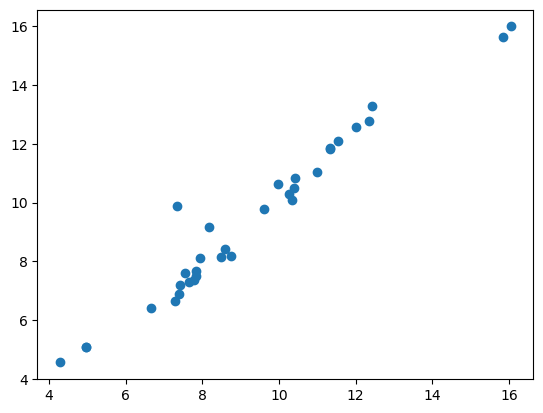

In [11]:
# SVM on Structural Features from cif-cn-featurizer

from sklearn.svm import SVR
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import pandas as pd

# load stored data to save time
svm_df=pd.read_csv('svm_df_binaryDescriptors.csv')



RNG_SEED = 42
np.random.seed(seed=RNG_SEED)

X = svm_df.drop(['CIF_id','Compound','A','B','Density','MP_num'],axis=1) # drop all string variables
y = svm_df['Density']

# Split data into test and train
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RNG_SEED)
# Split test into test and validation
#X_val_unscaled, X_test_unscaled, y_val, y_test = train_test_split(X_test_unscaled, y_test_unscaled, test_size=0.33, random_state=RNG_SEED)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
#X_val = scaler.transform(X_val_unscaled)
X_test = scaler.transform(X_test_unscaled)

# Normalize the data
X_train = normalize(X_train)
#X_val = normalize(X_val)
X_test = normalize(X_test)

svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
plt.scatter(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print('the r2 score is',r2)
mae = mean_absolute_error(y_test, y_pred)
print('the mean absolute error is',mae)
rmse_val = mean_squared_error(y_test, y_pred, squared=False)

# Without scaling the SVR performed terribly! SCALING ABSOLUTELY NECESSARY HERE!!!!





   formula     target
0    ErNi3  10.347703
1    EuPb3  10.671596
2    Mo3Pt  12.898261
3    EuSn3   7.801257
4    SmSn3   7.930209
..     ...        ...
92   DyPd3  11.700858
93   MoCo3   9.962997
94   Mo3Os  12.883572
95    YIn3   7.270778
96   TmPt3  18.661532

[97 rows x 2 columns]


Processing Input Data: 100%|██████████| 97/97 [00:00<00:00, 9709.73it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 97/97 [00:00<00:00, 1363.62it/s]

	Creating Pandas Objects...



Processing Input Data: 100%|██████████| 97/97 [00:00<00:00, 9692.85it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 97/97 [00:00<00:00, 1642.55it/s]


	Creating Pandas Objects...
the r2 score is 0.9993457723977782
the mean absolute error is 0.09845562750331356


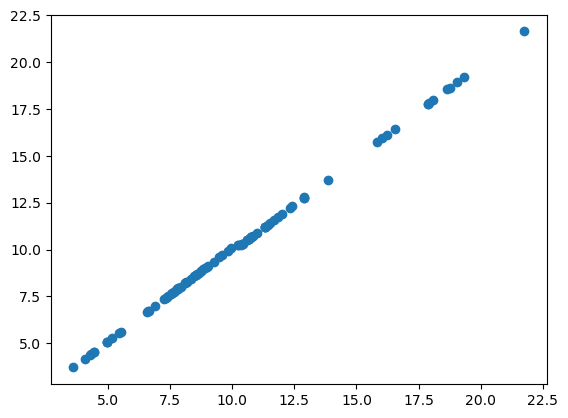

In [12]:
# SVM on Compositional Features from CBFV

from CBFV import composition

svm_df = svm_df.dropna()
rename_dict = {'Density': 'target', 'Compound':'formula'}
svm_df = svm_df.rename(columns=rename_dict)

RNG_SEED = 42
np.random.seed(seed=RNG_SEED)

X = svm_df[['formula']]
y = svm_df['target']

new_df = X.join(y)
print(new_df)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RNG_SEED)

X_train, y_train, formulae_train, skipped_train = composition.generate_features(new_df, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test, y_test, formulae_train, skipped_train = composition.generate_features(new_df, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)


svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
plt.scatter(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('the r2 score is',r2)
mae = mean_absolute_error(y_test, y_pred)
print('the mean absolute error is',mae)
rmse_val = mean_squared_error(y_test, y_pred, squared=False)


